In [15]:
#We are importing the necessary packages
#All of these libraries are included in the Anaconda Distribution of Python 3
#If you already have Python 3 installed, you can PIP Install all of
#these libraries thru command prompt "pip install library name"

import sklearn
#SK Learn or commonly refered to as SciKit Learn is the library that 
#allows us to create the algorithm and train it.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#matplotlib is a library that allows us to create powerful data visualizations
#based on the programming language Matlab
#line below allows the graphs to be displayed inside the Jupyter Notebook
from matplotlib import pyplot as plt
%matplotlib inline
#^if this is giving you an error YOU MUST run this in Jupyter Notebooks

#Pandas library allows for data analysis and the ability to bring in our 
#data set from Microsoft Excel.
import pandas
from pandas import ExcelFile

#Numpy is a library that contains support for multidimensional arrays
#and math functions both related and not related to arrays.
import numpy as np

#Seaborn is another library for data visualizations
import seaborn as sns

#end of imports


In [16]:
# df is the common variable name for your data frame.
#using pandas.read_excel to read the file and create a reference variable, df, for the data.
#Note: You must include the absolute path to your data source. So you will have to replace my path with YOUR path.
df = pandas.read_excel("E:\JMU School\python\house_price.xlsx")

In [17]:
#Now that we have our data we can begin to analyze the data.
#We do this because we must pick features for our model.
#We do not always have to open the data file.
#The first step, if you have not already done so in excel, is to find out how many observations and possible features we have.
#shape tells us how many rows and columns there are in our data set. 
#Think rows = instances or observations, 
#columns = possible features
#so concretely in this case we have 41 observations(houses) and 10 possible features.
#by most classifications this is a small dataset. Modern data sets can contain over 1 million observations.
print("Remember, the following line is read as there are 41 observations and 10 possible features in our data set.")
print(df.shape)

Remember, the following line is read as there are 41 observations and 10 possible features in our data set.
(41, 10)


In [18]:
#describe tells us summary statistics about our data set.
#This is helpful in with respect to exploratory data analysis that must be done prior to feature selection.
print(df.describe().round(2))

            ID       price  bedroom  bathroom   lot_size  built_in     area  \
count    41.00       41.00    41.00     41.00       41.0     41.00    41.00   
mean   1030.44   352175.61     3.46      2.95   226440.9   1986.34  2450.39   
std      31.76   225023.12     1.03      1.40   922674.2     23.88  1362.55   
min     993.00   134900.00     2.00      1.00     2178.0   1924.00   864.00   
25%    1006.00   182000.00     3.00      2.00     8682.0   1970.00  1464.00   
50%    1020.00   309900.00     3.00      3.00    13504.0   1993.00  2003.00   
75%    1047.00   429000.00     4.00      4.00    21780.0   2005.00  3145.00   
max    1104.00  1100000.00     6.00      6.00  4356000.0   2018.00  5955.00   

         days    views  
count   41.00    41.00  
mean    44.24   434.56  
std     33.95   405.81  
min      3.00    17.00  
25%     17.00   110.00  
50%     34.00   310.00  
75%     76.00   709.00  
max    103.00  1357.00  


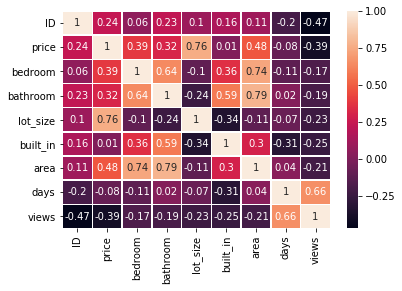

In [19]:
#Here we are creating a heat matrix. A heat matrix is useful because it visualizes how 
#Each variable correlates with every other variable and most importantly the variable we want to predict.
#annot = True displays the values inside the cells.
#linewidths creates a border between the cells for visualization purposes.
#Generally, we are looking for how variables correlate with our desired output, and how possible features correlate with eachother.
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, linewidths = .5)

In [21]:
#in-depth feature selection is beyond the scope of this assignment, but more research can be done independently.
#For this assignment I have selected lot size, area, bedroom, bathroom as my features

#combine multiple feature vectors to one 2D array using numpy
#this is where we define what we are using as inputs (features)
#and we define what we want the output to be in this case it will be the price of the house
X = np.column_stack((df.lot_size,df.area,df.bedroom,df.bathroom)) 
y = df.price

#now that we have defined X we can visualize it.
# Capital X in machine learning usually refers to an entire matrix where as lower case x would refer to a feature vector.
#printing the first 5 rows(observations) and their features for visualization purposes.
print("This is all of the features for the first 5 observations.")
print(X[:5])

This is all of the features for the first 5 observations.
[[10018  1541     3     2]
 [ 8712  1810     4     2]
 [13504  1456     3     2]
 [10130  2903     5     4]
 [18295  2616     3     2]]


In [22]:
#split data for training and testing
#I split the data into 80% training and 20% testing. This is the rule of thumb. 
#But in deep neural networks with data sets with around 1 million observations the split can be pushed as far as 95%/5%
# i have the random state set to 9 here. this is arbitrary. It appears to be standard practice
#to choose a random state instead of leaving it as None.
#notice how the uppercase X
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 , random_state=9)

#.fit is what performs the optmization, in this case minimization for us.
lr = LinearRegression().fit(X_train, y_train)

In [30]:
#printing out the coefficient and intercept of the linear regression function, theta0 and theta1 up to thetaN from previous example
#the topic above is expanded on in the ppt if you are still uneasy.
#rounded to 4 decimal points for simplification
print("lr.coefficents_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [2.32792352e-01 6.73951627e+01 1.74353188e+04 2.58237719e+04]
lr.intercept_: -3928.2563710926333


In [31]:
#R square value tells us how accurate a fit our line of best fit is/ linear regression function
print("Training R Square: {:.2f}".format(lr.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(lr.score(X_test, y_test)))

Training R Square: 0.92
Test R Square: 0.90
